## Analyze A/B Test Results
### `By: Louaye Lamaa`

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"').shape[0] + df.query('group != "treatment" and landing_page == "new_page"' ).shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2  = df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" and landing_page == "new_page")')

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset='user_id',inplace=True)

<ipython-input-13-ef684a312b3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset='user_id',inplace=True)


In [14]:
#check if there no more duplication for this user ==> one user with this ID
df2[df['user_id'] == 773192]

<ipython-input-14-a73a1761251e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df['user_id'] == 773192]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# probability of converting
df2.converted.mean()
#df2[df2['converted'] == 1].shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#probability of converted given the individual is in the control group
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

In [17]:
#df2.groupby('group')['converted'].mean()

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#probability of converting given the individual is in the treatment group
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#probability of receiving a new page 
df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

** Based on the probabilities above, the conversion rate to a new page between the control group (12.04 %) and the treatment group (11.88 %) is so close. Given the probability of receiving a new page is almost equal to receiving the old one, these probabilities are not sufficient to conclude that the new treatment page -or the old page- leads to more conversions even though the rate in the control group is higher. More analysis is needed.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

** The null hypothesis h0 is that the old page is same or better than the new page in terms of conversion rate.**
 
  **The alternative hypotheis is that the new page is better.** 
  
  **H0:  **$p_{new}$** - **$p_{old}$** <= 0**
  
  **H1: **$p_{new}$** - **$p_{old}$** > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [16]:
#under null ==>converted
p_new_0 = df.query('converted == 1').shape[0] / df.shape[0]
p_new_0

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [17]:
p_old_0 = df.query('converted == 1').shape[0] / df.shape[0]
p_old_0

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [18]:
nb_new = df2[df2['group'] == "treatment"].shape[0]
nb_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [19]:
nb_old = df2.query('group == "control"').shape[0]
nb_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# simulation transactions (1 converted, 0 is not) with a size equals to the individuals in the treatment group with the probability of the conversion for the new page.
new_page_converted = np.random.choice([1,0],p=[p_new_0,1-p_new_0],size=nb_new)
new_page_converted.mean()

0.11948248572018444

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [21]:
old_page_converted = np.random.choice([1,0],p=[p_old_0,1-p_old_0],size=nb_old)
old_page_converted.mean()

0.1202210994396795

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [23]:
new_page_converted.mean()  - old_page_converted.mean()

-0.0007386137194950598

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [24]:
p_diffs=[]
for _ in range(10000):
    new_page_converted_mean = np.random.choice([1,0],p=[p_new_0,1-p_new_0],size=nb_new).mean()
    old_page_converted_mean = np.random.choice([1,0],p=[p_old_0,1-p_old_0],size=nb_old).mean()
    mean_diff = new_page_converted_mean - old_page_converted_mean
    p_diffs.append(mean_diff)
    

In [25]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

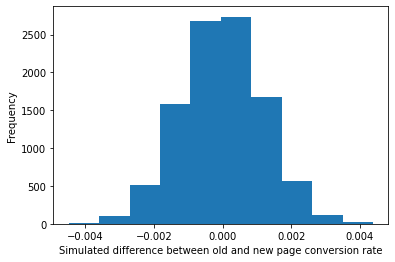

In [26]:
plt.hist(p_diffs);
plt.xlabel('Simulated difference between old and new page conversion rate')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#actual difference in the original dataset
obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
obs_diff

-0.0015782389853555567

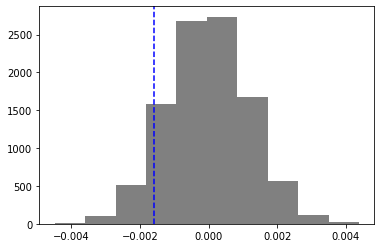

In [28]:
plt.hist(p_diffs,color='grey');
plt.axvline(obs_diff,color='blue',linestyle='--');

In [29]:
#propotion of the p_diffs are greater than the actual difference observed
(p_diffs > obs_diff).mean()

0.9086

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is called the P-value. The p-value is the probability of finding the observed or more extreme than the actually observed results, when the null hypothesis H0 is assumed the valid hypothesis. The p-value depends on the H1 hypothesis as it tells what is extreme. So, here the p-value is 0.9086 means that 90.86% of simulated difference is greater than the actual observed difference (the right part of the blue line in the histogram above). When p-value is bigger than alpha (error type 1 threshold), we say that we failed to reject the null hypothesis. This is the case here as 0.9086 > 0.05 , so H0 is not rejected and then the new page is not doing any better than the old page in terms of conversion rates.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

In [31]:
print('The number of rows for old page is {}'.format(n_old))
print('The number of converted rows for old page is {}'.format(convert_old))
print('The number of rows for new page is {}'.format(n_new))
print('The number of converted rows for new page is {}'.format(convert_new))

The number of rows for old page is 145274
The number of converted rows for old page is 17489
The number of rows for new page is 145310
The number of converted rows for new page is 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
#count here is number new and old page converted (number of successes) for each sample (new and old) 

#nobs: number of obervations for each type of page ()

#In the two sample test, alternative 'larger' means that the alternative hypothesis is p1 > p2 where p1 (here p_new) is the proportion of the first sample and p2 (p_old) of the second one.

sm.stats.proportions_ztest(count=[convert_new,convert_old],nobs=[n_new,n_old],alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The first value is the z score for two sample test. The z score indicates how many standard deviations from the difference in means the score is. Here, the score is 1.31 standard deviations under the difference in mean, indicating the distance between mean of new and old is -1.31 in units of the standard error.**

**The second value is the p-value. It is bigger than alpha=0.05, which means H0 could not be rejected (converion rate of the old is bigger or equal to the new's). Those results are similiar of the above in part j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression as the response variable is a categorical variable (binary: converted or not).**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

<ipython-input-33-6da54ac52112>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
<ipython-input-33-6da54ac52112>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


In [34]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-06-09 15:08 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**In the part 2, the alternative hypothesis was if the new page leads to a better conversion rate.**

**Here in the logistic regression approach, the alternative hypothesis is that if the difference in conversion is associated with the page type, so in other terms, we need to know if there is evidence about the change in conversion depending on the varibale of page type. The formula of logistic regression here: **

$log^(P(converted)/P(notConverted))=b0+b1∗Page$

**So, the hypothesis:**

 **- H0: B = 0** (B is the coefficients on the parameters of the logistic regression of the probability of conversion )
 
 **- H1: B ≠ 0**

**The p-value here is 0.1899, which is greater than alpha, as in the part 2, which means the difference in the conversion is not statistically significant assiocaited with the page type.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**I think using different metrics to measure the difference in the conversion could lead to more accurate results while it will be more complex as interactions between those variables could exist.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [3]:
df_countries = pd.read_csv('data/countries.csv')
df3 = df2.join(df_countries.set_index('user_id'), on='user_id')
df3.head()

In [38]:
df3[['USA','UK','CA']] = pd.get_dummies(df3['country'])[['US','UK','CA']]
#df3[df3['country'] == 'US']['USA'].value_counts()
#df3.country.value_counts()

In [39]:
model_countries = sm.Logit(df3['converted'],df3[['intercept','ab_page','UK','CA']])
results_countries = model_countries.fit()
results_countries.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-06-09 15:14 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
==================================================================

"""

**The p-value of both dummies variables are greater than 0.05, so they are not statistically significant, which means the H0 could not be rejected and the location of the user is not associated  with the difference in the conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

**To see if there an interaction between the two explanatory variables exist, we have to add the b3.x1.x2 to the formula. So, I will add an interaction between the country and the page variables.**

In [40]:
def addInteraction(df,int_col,country):
    df[int_col] = df['ab_page']*df[country]
    return df

In [41]:
addInteraction(df3,'page_US','USA')
addInteraction(df3,'page_UK','UK')
addInteraction(df3,'page_CA','CA')

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,USA,UK,CA,page_US,page_UK,page_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,US,1,0,0,0,0,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,US,1,0,0,0,0,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US,1,0,0,0,0,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US,1,0,0,0,0,0


In [42]:
model_interaction = sm.Logit(df3['converted'],df3[['intercept','ab_page','UK','CA','page_UK','page_CA']])
results_interaction = model_interaction.fit()
results_interaction.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-06-09 15:14 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
page_UK       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
page_CA      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

**It looks the same as above. The p-value is not signficant for any of the variables used in the model, which means the H0 could not be rejected and there is no evidence that a new page or the country of the user have an impact on the conversion.**

**To conclude, I think the test has a large population, split fairly in term of size between the two groups, the data is good, clean and not messy. The test duration is 21 days, which I believe is a good length for this experiment to eliminate the possibilities of aversion or novelty effect. I think based on this and the results from the A/B tests as well as the regression approach, the new page didn't lead to an increase in the conversion rate, and there is no benefit to implementing it.**
